# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Скачиваем данные

In [3]:
x_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./Y_train.csv')
y = (y_train.target == 1) * 1
#test = pd.read_csv('./X_test.csv')

In [4]:
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [5]:
x_train.shape

(105109, 10)

In [6]:
y.value_counts(normalize=True)

0    0.933108
1    0.066892
Name: target, dtype: float64

In [7]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

# Краткий анализ имеющихся данных

###### Проверка типов данных

In [8]:
x_train.dtypes

credit_card_utilization       float64
age                             int64
overdue_30_59_days              int64
debt_to_income                float64
monthly_income                float64
credits_loans                   int64
overdue__more_than_90_days      int64
mortgage_loans                  int64
overdue_60_89_days              int64
family_members                float64
dtype: object

###### Проверка пропусков

In [9]:
pd.isnull(x_train).sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
dtype: int64

###### Проверка количества уникальных

In [10]:
x_train.nunique()

credit_card_utilization        97475
age                               86
overdue_30_59_days                15
debt_to_income                102217
monthly_income                 82956
credits_loans                     59
overdue__more_than_90_days        16
mortgage_loans                    27
overdue_60_89_days                13
family_members                    13
dtype: int64

###### Баланс классов

In [11]:
x_train['overdue_30_59_days'].value_counts(normalize=True)

0     0.839709
1     0.107155
2     0.030759
3     0.011626
4     0.004995
5     0.002293
98    0.001798
6     0.000970
7     0.000352
8     0.000162
9     0.000076
96    0.000048
10    0.000038
12    0.000010
11    0.000010
Name: overdue_30_59_days, dtype: float64

# Предобработка данных

###### Заполнение пропусков
Заполняем пропущенные данные в месячном доходе и количестве членов семьи медианными значениями, так как эта метрика выглядит наиболее логичной

In [12]:
print ('Кол-во пропущенных в monthly_income:', sum(x_train['monthly_income'].isnull()))
x_train[x_train['monthly_income'].isnull()].head(5)

Кол-во пропущенных в monthly_income: 20993


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
20,1.156862,69,0,34.666092,NaN,0,0,0,0,0.0
23,0.176205,93,0,297.962783,NaN,3,0,0,0,NaN
36,0.280279,49,0,2226.820771,NaN,6,0,2,0,2.0
39,0.148479,47,0,5322.022996,NaN,15,0,3,0,2.0
40,0.027631,55,0,7393.317898,NaN,12,0,2,0,0.0


In [13]:
x_train['monthly_income'].median()

5361.778459884576

In [14]:
x_train['monthly_income']=x_train['monthly_income'].fillna(x_train['monthly_income'].median())

x_train['monthly_income'][20:30]

20     5361.778460
21     3563.759868
22     9500.518840
23     5361.778460
24     4440.500414
25    21381.951686
26     2381.974505
27     2821.249473
28     5578.877263
29    10058.364487
Name: monthly_income, dtype: float64

In [15]:
print ('Кол-во пропущенных в family_members:', sum(x_train['family_members'].isnull()))
x_train[x_train['family_members'].isnull()].head(5)

Кол-во пропущенных в family_members: 2805


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
23,0.176205,93,0,297.962783,5361.77846,3,0,0,0,NaN
43,0.049335,77,0,695.154036,5361.77846,8,0,1,0,NaN
58,1.170441,33,0,690.020506,5361.77846,4,0,0,0,NaN
135,0.000000,79,0,0.000000,5361.77846,2,0,0,0,NaN
164,1.029744,36,2,391.364373,5361.77846,3,3,0,0,NaN


In [16]:
x_train['family_members'].median()

0.0

In [17]:
x_train['family_members'] = x_train['family_members'].fillna(x_train['family_members'].median())

In [18]:
x_train['family_members'][20:30]

20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    3.0
26    0.0
27    1.0
28    1.0
29    1.0
Name: family_members, dtype: float64

In [19]:
pd.isnull(x_train).sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

# Кодирование категориальных признаков

In [20]:
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [21]:
num = ['credit_card_utilization', 'age', 'debt_to_income', 'monthly_income','credits_loans','mortgage_loans', 'family_members' ]
cat = ['overdue_30_59_days', 'overdue__more_than_90_days', 'overdue_60_89_days']
target = 'target'

In [22]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(cols=cat)

In [23]:
x_train = ohe.fit_transform(x_train)
x_train

,credit_card_utilization,age,overdue_30_59_days_1,overdue_30_59_days_2,overdue_30_59_days_3,overdue_30_59_days_4,overdue_30_59_days_5,overdue_30_59_days_6,overdue_30_59_days_7,overdue_30_59_days_8,...,overdue_60_89_days_5,overdue_60_89_days_6,overdue_60_89_days_7,overdue_60_89_days_8,overdue_60_89_days_9,overdue_60_89_days_10,overdue_60_89_days_11,overdue_60_89_days_12,overdue_60_89_days_13,family_members
0,0.000000,56,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0.170659,45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.342176,75,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0.046219,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
4,0.679556,58,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
105105,0.980631,25,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
105106,0.050256,73,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
105107,0.447882,43,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# Генерация признаков (не производилась)

In [24]:
Xtr=x_train
Ytr=y_train

# Выбор модели и оптимизация

##### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [26]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [27]:
GS_LR.fit(X=Xtr, y=Ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [28]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 0.0026366508987303553}

In [29]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

0.8033326041535137

In [30]:
GS_LR.best_estimator_.coef_

array([[ 8.57920993e-06, -1.53401376e-02, -8.94846554e-01,
         2.72234877e-01,  2.10512134e-01,  1.16166627e-01,
         6.91793574e-03,  6.57302349e-02,  1.81693257e-02,
         2.62691940e-02,  3.41906792e-02,  9.77356143e-04,
         1.75478574e-03,  1.12867787e-03,  8.86952672e-04,
        -3.26299999e-05,  3.28181926e-04, -3.37882324e-05,
        -4.45042622e-05, -5.35742692e-03, -7.96081121e-01,
         3.08895440e-01,  4.32168775e-02,  1.55264659e-01,
         8.11965126e-02,  2.62691940e-02,  1.73362777e-02,
         8.21597875e-03,  5.19992809e-03,  3.73774345e-03,
         3.60372437e-03,  5.41656051e-04,  1.12867787e-03,
         6.32807431e-04,  9.65103505e-04,  2.64317883e-04,
         1.76621002e-01, -6.58839088e-01,  3.23821306e-01,
         3.77804328e-02,  1.06172492e-01,  2.62691940e-02,
         1.33885245e-02,  2.56450258e-03,  6.00152247e-03,
         1.53623102e-03,  1.12867787e-03, -5.23881930e-05,
         2.92061985e-04,  3.24308550e-04,  2.51202664e-0

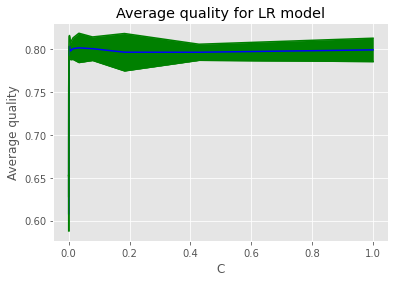

In [31]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

# Нормировка данных

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler(with_mean=True, with_std=True)

## Готовим предсказания на тестовых данных

In [34]:
x_test = pd.read_csv('./X_test.csv')
x_test

,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
38871,44475,0.731740,39,0,0.251005,3474.894386,5,0,0,0,0.0
38872,103189,0.010959,70,0,0.152539,4170.426464,14,0,1,0,0.0
38873,48732,0.084612,52,0,5288.053772,NaN,15,0,2,0,0.0
38874,135410,0.741717,51,0,0.378356,5441.458787,9,0,2,0,0.0


In [35]:
x_test.drop('index', axis=1, inplace=True)

In [36]:
pd.isnull(x_test).sum()

credit_card_utilization          0
age                              0
overdue_30_59_days               0
debt_to_income                   0
monthly_income                7545
credits_loans                    0
overdue__more_than_90_days       0
mortgage_loans                   0
overdue_60_89_days               0
family_members                 955
dtype: int64

In [37]:
x_test.shape

(38876, 10)

In [38]:
X=x_test
X.shape

(38876, 10)

# Pipeline

In [39]:
x_train = pd.read_csv('./X_train.csv')
X=x_train
y_train = pd.read_csv('./Y_train.csv')
y = (y_train.target == 1) * 1

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [41]:
X.shape

(105109, 10)

In [42]:
y.shape

(105109,)

In [43]:
class FeaturesTransform(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, df):
        df['monthly_income'] = df['monthly_income'].fillna(df['monthly_income'].median())
        df['family_members'] = df['family_members'].fillna(df['family_members'].median())
        return df

In [44]:
vc = VotingClassifier([('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft')

In [45]:
pipe = Pipeline([('features', FeaturesTransform()),
                 ('cats', OneHotEncoder(cols=cat)),
                 ('scaler', StandardScaler()),
                 ('best_model', vc)
                ])

In [46]:
a_p = pipe.fit_transform(X, y)

In [47]:
a_p

array([[0.96326511, 0.03673489],
       [0.91045163, 0.08954837],
       [0.96028309, 0.03971691],
       ...,
       [0.94635379, 0.05364621],
       [0.89772706, 0.10227294],
       [0.90189411, 0.09810589]])

### Готовим предсказания на отправку

In [48]:
X_test = pd.read_csv('./X_test.csv')
X_test.drop('index', axis=1, inplace=True)
X_test

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...
38871,0.731740,39,0,0.251005,3474.894386,5,0,0,0,0.0
38872,0.010959,70,0,0.152539,4170.426464,14,0,1,0,0.0
38873,0.084612,52,0,5288.053772,NaN,15,0,2,0,0.0
38874,0.741717,51,0,0.378356,5441.458787,9,0,2,0,0.0


In [49]:
X_test.shape

(38876, 10)

In [50]:
preds = pipe.predict_proba(X_test)[:, 1]

In [51]:
preds

array([0.02168383, 0.01718049, 0.12276554, ..., 0.03107475, 0.03461784,
       0.00045435])

In [52]:
preds.max()

0.9954927042265153

In [53]:
preds.min()

2.3070455107615594e-29

In [54]:
y_test_sample = pd.read_csv('./y_test_sample.csv')

In [55]:
preds.shape

(38876,)

In [56]:
y_test_sample["target"] = preds

In [57]:
print(y_test_sample)

        index    target
0      143522  0.021684
1      116747  0.017180
2       66075  0.122766
3      133292  0.051219
4       83134  0.037216
...       ...       ...
38871   44475  0.039839
38872  103189  0.021514
38873   48732  0.031075
38874  135410  0.034618
38875   73457  0.000454

[38876 rows x 2 columns]


In [58]:
y_test_sample.to_csv('./y_test_sample.csv', index=False)

In [59]:
y_test_sample_new = pd.read_csv('./y_test_sample.csv')
y_test_sample_new

,index,target
0,143522,0.021684
1,116747,0.017180
2,66075,0.122766
3,133292,0.051219
4,83134,0.037216
...,...,...
38871,44475,0.039839
38872,103189,0.021514
38873,48732,0.031075
38874,135410,0.034618


In [60]:
y_test_sample_new.loc[y_test_sample_new['target'] > 0.9, ['target']].head()

,target
1542,0.964853
4181,0.967464
4311,0.907450
4362,0.904872
4487,0.911162


In [61]:
y_test_sample_new.loc[y_test_sample_new['target'] < 0.1, ['target']].head()

,target
0,0.021684
1,0.017180
3,0.051219
4,0.037216
5,0.060091
